In [7]:
from numpy import *
 
##################################################################
# Recursive generation of the Legendre polynomial of order n
def Legendre(n,x):
	x=array(x)
	if (n==0):
	    return x*0+1.0
	elif n==1:
		return x
	else:
		return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n
 

In [8]:
# Derivative of the Legendre polynomials
def DLegendre(n,x):
    x=array(x)
    if n==0:
	    return x*0
    elif (n==1):
        return x*0+1.0
    else:
        return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))

In [9]:
# Roots of the polynomial obtained using Newton-Raphson method
def LegendreRoots(polyorder,tolerance=1e-20):
    if polyorder<2:
        err = 1        # bad polyorder no roots can be found
    else:
        roots=[]
		# The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
        for i in range(1, int(polyorder/2) +1):
            x = cos(pi*(i-0.25)/(polyorder+0.5))
            error = 10*tolerance
            iters = 0
            while (error>tolerance) and (iters<1000):
                dx=-Legendre(polyorder,x)/DLegendre(polyorder,x)
                x=x+dx
                iters=iters+1
                error=abs(dx)  
            roots.append(x)
		# Use symmetry to get the other roots
        roots=array(roots)
        if polyorder%2==0:
            roots=concatenate( (-1.0*roots, roots[::-1]) )
        else:
            roots=concatenate( (-1.0*roots, [0.0], roots[::-1]) )
        err=0 # successfully determined roots
        return [roots, err]

In [10]:
# Weight coefficients
def GaussLegendreWeights(polyorder):
	W=[]
	[xis,err]=LegendreRoots(polyorder)
	if err==0:
		W=2.0/( (1.0-xis**2)*(DLegendre(polyorder,xis)**2) )
		err=0
	else:
		err=1 # could not determine roots - so no weights
	return [W, xis, err]

In [11]:
# The integral value 
# func 		: the integrand
# a, b 		: lower and upper limits of the integral
# polyorder 	: order of the Legendre polynomial to be used
#
def GaussLegendreQuadrature(func, polyorder, a, b):
	[Ws,xs, err]= GaussLegendreWeights(polyorder)
	if err==0:
		ans=(b-a)*0.5*sum( Ws*func( (b-a)*0.5*xs+ (b+a)*0.5 ) )
	else: 
		# (in case of error)
		err=1
		ans=None
	return [ans,err]
##################################################################
# The integrand - change as required
def func(x):
	return exp(x)
##################################################################
# 

In [12]:
order = 5
[Ws,xs,err] = GaussLegendreWeights(order)
if err==0:
	print ("Order    : ", order)
	print ("Roots    : ", xs)
	print ("Weights  : ", Ws)
else:
	print ("Roots/Weights evaluation failed")
 
# Integrating the function
[ans,err]=GaussLegendreQuadrature(func , order, -3,3)
if err==0:
	print ("Integral : ", ans)
else:
	print ("Integral evaluation failed")

Order    :  5
Roots    :  [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights  :  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
Integral :  20.035577718385564


In [13]:
Ws.shape

(5,)

In [14]:
def func2 (x):
    return x**4

In [15]:
[ans,err]=GaussLegendreQuadrature(func2 , order, -3,3)
if err==0:
	print ("Integral : ", ans)
else:
	print ("Integral evaluation failed")

Integral :  97.20000000000002


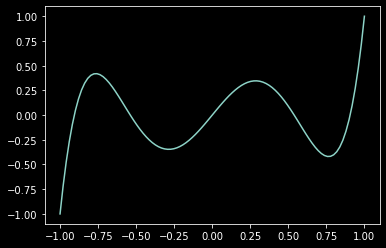

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.linspace(-1,1,100)
y = Legendre(5,x)
plt.plot(x,y)

In [17]:
yroot = np.zeros(10)
[xroot,er] = LegendreRoots(10)


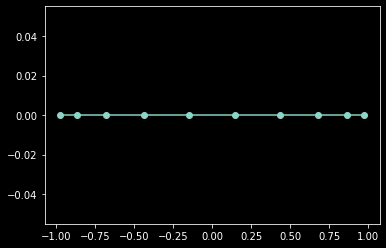

In [18]:
#plt.plot(xroot,yroot, marker = 'o')
plt.plot(xroot,yroot,marker = 'o')